In [1]:
# let's import required package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # formating data categorical to numerical
# import all classification algorithm to choose best performing model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Project Name :- Telecom Customer Churn Analysis 

- Customer churn is when a company’s customers stop doing business with that company.

- Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new     customer.

- Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

- Customer retention can be achieved with good customer service and products. But the most effective way for a company to         prevent attrition of customers is to truly know them.

- The vast volumes of data collected about customers can be used to build churn prediction models. 

- Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching     services are so low. You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several   customer churn prediction models.

- In This Dataset we have 21 columns  and 7043 rows

- in which Customer Churn column is our target variable and other column is our input varible.

- the main  of this project is to predict the Customer Churn(customer Attrition) for telecom Industry

# Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers

In [2]:
# Loading the dataset.
churn = pd.read_csv('TelecomCustomer_Churn.csv',na_values='?',sep=',')

In [3]:
# let's preview the dataset
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# let's check final shape of dataset
churn.shape

(7043, 21)

In [5]:
# let's check the datatypes of all feature which present in dataset

churn.dtypes

# Seeing below datatypes on thing is clear that Total charges need to converted to float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Information about the data columns
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# now check feature name presence in the dataset

churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# let's check how many unique values presents in the each columns in the dataset

for col in churn.columns:
    print(churn[col].unique(),"\t",churn[col].nunique())
    

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 	 7043
['Female' 'Male'] 	 2
[0 1] 	 2
['Yes' 'No'] 	 2
['No' 'Yes'] 	 2
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 	 73
['No' 'Yes'] 	 2
['No phone service' 'No' 'Yes'] 	 3
['DSL' 'Fiber optic' 'No'] 	 3
['No' 'Yes' 'No internet service'] 	 3
['Yes' 'No' 'No internet service'] 	 3
['No' 'Yes' 'No internet service'] 	 3
['No' 'Yes' 'No internet service'] 	 3
['No' 'Yes' 'No internet service'] 	 3
['No' 'Yes' 'No internet service'] 	 3
['Month-to-month' 'One year' 'Two year'] 	 3
['Yes' 'No'] 	 2
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 	 4
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 	 1585
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 	 6531
['No' 'Yes'] 	 2


In [9]:
# let's check total count of class in churn columns

churn['Churn'].value_counts()

# customer churn ratio is less as compare no churn ratio

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
#Lets convert "TotalCharges" column object to float type

churn["TotalCharges"]=churn["TotalCharges"].str.strip()
churn["TotalCharges"]=pd.to_numeric(churn["TotalCharges"])

In [11]:
#Lets chcek the datatypes again
churn.dtypes

# we observe datatype has been changed to float for "TotalCharges" columnb

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# let's finding null and nan values whether it is available in the Customer churn dataset dataset or not.

print('total number of null values:\n',churn.isnull().sum())

#We can see in the entire dataset have no missing values except Total Charge we treat them later

total number of null values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [13]:
# univariate analysis of Numerical  variables using a describe() function
# describe function provide  statistics summary of continuous variable.

churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# let's check detail information of categorical and boolean varible
    
churn.describe(include=['object', 'bool'])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5174-ITUMV,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


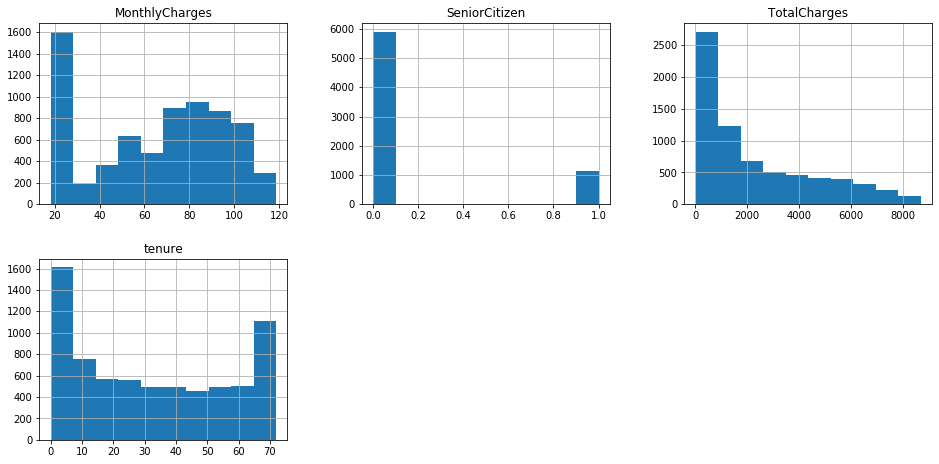

In [15]:
# let's do ploting using histogram to know about numerical variabkles in the dataset whether it is normal distribution or not.

churn.hist(figsize=(16,12),layout=(3,3))
plt.show()

In [16]:
# let's check skewed columns with the help of skew()
churn.skew()

# as per below data only Total Charges is positively skwed 

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

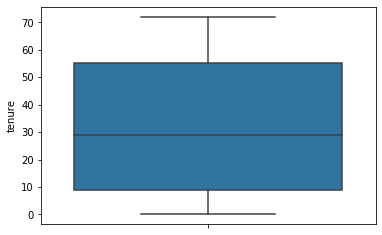

In [17]:
# let's plot boxplot to check outliers present in the dataset or not

sns.boxplot(y='tenure',data=churn)

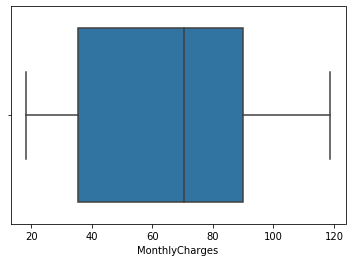

In [18]:
# let's plot boxplot for MonthlyCharges column
sns.boxplot(x='MonthlyCharges',data=churn)

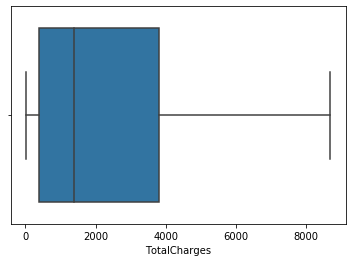

In [19]:
# let's check Total charge column TotalCharges
sns.boxplot(x='TotalCharges',data=churn)


# key observation :-

- the histogram of tenure column seem like normal distribution

- the histogram Total Charge column show average Total charged tacken by customer is 2200

- from the histogram we say that customer paying average monthly charged 70 rs.

- unique id is above 7000 in the customer id column so it is need to drop .

In [20]:
#Lets chcek the value counts of each column of object datatype
for col in churn.columns:
    if churn[col].dtype=="object":
        print(churn[col].value_counts())
        print()

5174-ITUMV    1
7753-USQYQ    1
2202-CUYXZ    1
7718-RXDGG    1
6302-JGYRJ    1
             ..
9465-RWMXL    1
5120-ZBLAI    1
8621-MNIHH    1
8984-EYLLL    1
6214-EDAKZ    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, 

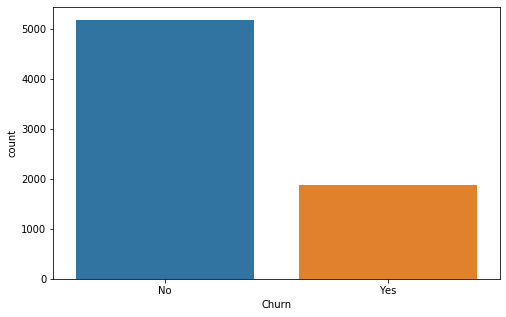

In [21]:
# Let's do some plotting to know how the columns data distributed in the  dataset¶
# univariate data analysis by graphical representation.
# firstly we will plotting Churn feture with help of counplot to understand whether it's balanced or imblanced data

plt.figure(figsize=(8,5))
sns.countplot(x='Churn',data=churn)

# based on below graph we say that output label has imblanceb data because 5174 are no churn customers out of 7043.

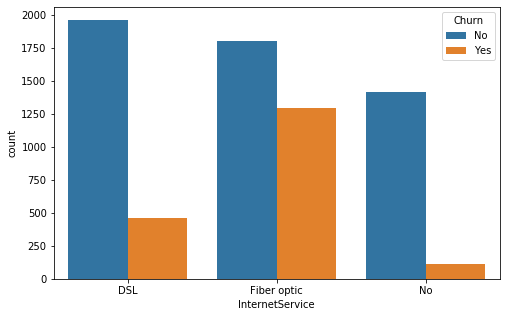

In [22]:
#Lets check the count of churn on the basis InternetService

plt.figure(figsize=(8,5))
sns.countplot(x="InternetService",hue='Churn',data=churn)
plt.show()

#High amount of people who churned are having InternetService of Fiber optic type

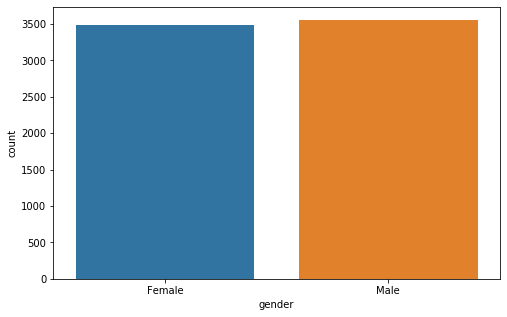

In [23]:
#Lets check  the churn on the basis of gender
plt.figure(figsize=(8,5))
sns.countplot(x="gender",data=churn)
plt.show()

# from the below graph we say that the boh type of genders equally churned

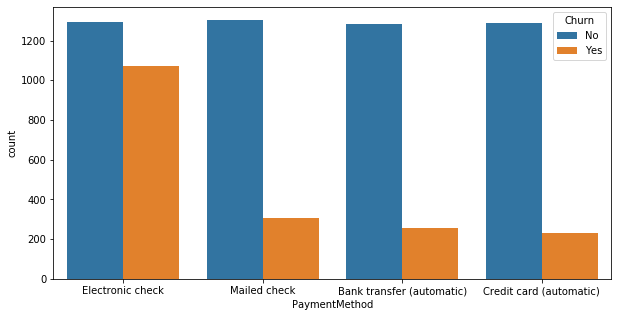

In [24]:
#lets check the count of customers who churned on basis of PaymentMethod

plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod",hue="Churn",data=churn)
plt.show()

# from the below graph we obseved churn is  more than 50% of churn where customers are using "Electronic check"
# We can say this mode of payment has multiple issues because of which customer churn is high

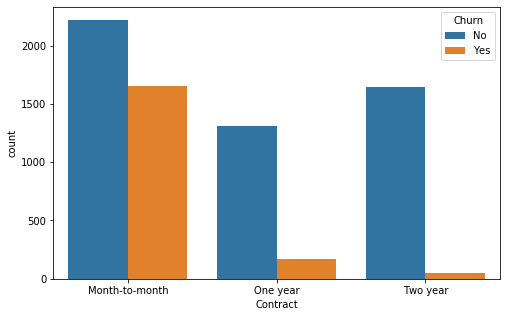

In [25]:
# let's check Customer Churn on the basis of Contract

plt.figure(figsize=(8,5))
sns.countplot(x="Contract",data=churn,hue="Churn")
plt.show()

#Customers who have churned are mostly having contract of Month to Month
# where customer having contract for two years they are mostly not churned

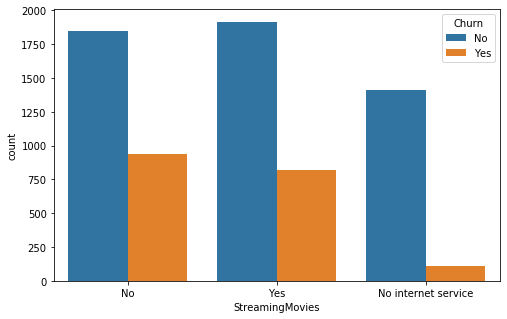

In [26]:
#lets chcek the count of customers churn on the basis StreamingMovies
plt.figure(figsize=(8,5))
sns.countplot(x="StreamingMovies",data=churn,hue="Churn")
plt.show()

# less churned customer where are not gatting internent services class

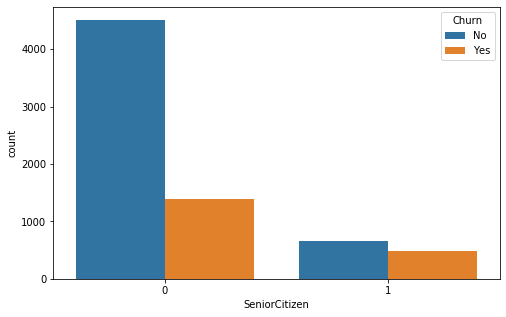

In [27]:
# Now lets check the count of churn on the basis of  SeniorCitizen
plt.figure(figsize=(8,5))
sns.countplot(x="SeniorCitizen",hue="Churn",data=churn)
plt.show()

#Most of the senior citizens churned 

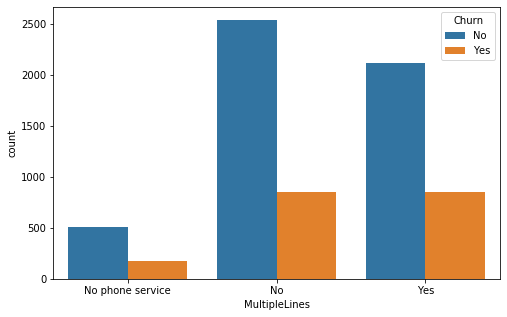

In [28]:
#lets chcek the count of customers churn on the basis "MultipleLines"

plt.figure(figsize=(8,5))
sns.countplot(x="MultipleLines",data=churn,hue="Churn")
plt.show()

# Customers who have churned eually in the case of no multipleLines and Yes Multiplelines 

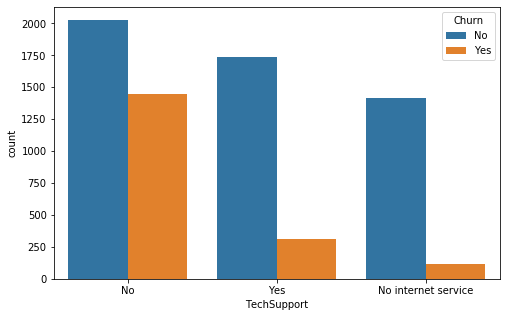

In [29]:
#lets chcek the count of customers churn on the basis MultipleLines
plt.figure(figsize=(8,5))
sns.countplot(x="TechSupport",data=churn,hue="Churn")
plt.show()

# people who churned mostly were not having TechSupport

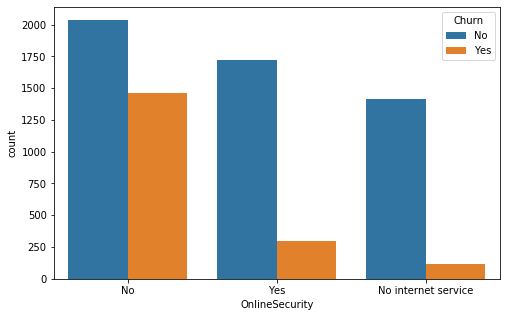

In [30]:
#lets chcek the count of customers churn on the basis MultipleLines
plt.figure(figsize=(8,5))
sns.countplot(x="OnlineSecurity",data=churn,hue="Churn")
plt.show()

# people who churned mostly were not having onlinesecurity

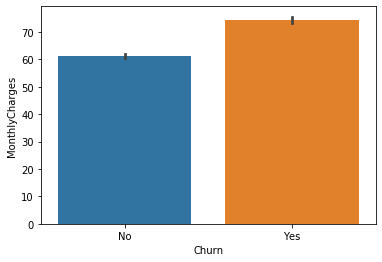

In [31]:
#lets chcek the montly charges af the customers who chunrned compare who not churned

sns.barplot(x="Churn",y="MonthlyCharges",data=churn)
plt.show()

#customers who churned were monthly charged more than 60.

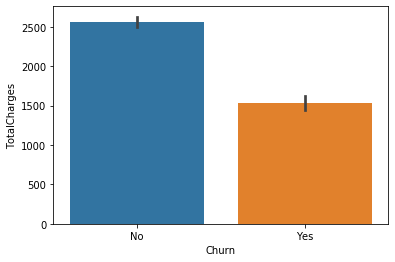

In [32]:
#lets chcek the montly charges af the customers who chunrned compare who not churned

sns.barplot(x="Churn",y="TotalCharges",data=churn)
plt.show()

#customers who churned were Total charged more than 1500 

In [33]:

pd.crosstab(churn['MonthlyCharges'],churn['Churn'],margins=True)


Churn,No,Yes,All
MonthlyCharges,,,
18.25,1,0,1
18.4,1,0,1
18.55,1,0,1
18.7,2,0,2
18.75,1,0,1
...,...,...,...
118.35,0,1,1
118.6,2,0,2
118.65,1,0,1


In [34]:
# let's fill the  null values with mean using fillna method in Total charge column

churn["TotalCharges"].fillna(churn["TotalCharges"].mean(),inplace=True)

In [35]:
# let's drop columns which are not help in accurate prediction
churn.drop('customerID',axis=1,inplace=True)

In [36]:
# let's treat skewness of TotalCharges column
churn['TotalCharges']=np.log1p(churn['TotalCharges'])

In [37]:
# let's convert all our categorical varibles into numeric by encoding the categories
# we using labelEncoder for that
 
label = LabelEncoder()
for col in churn:
     if churn[col].dtype == 'object':
        churn[col] = label.fit_transform(churn[col].astype('str'))

In [38]:
# let's check datatype again 
churn.dtypes
# as we see below after applying enconding techniques all the object column convert in numeric form

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [39]:
# let's check correlation between numerical varible
data = churn.corr()

In [40]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.006096,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.100451,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.339167,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.095558,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.831575,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.072660,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.436756,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.204113,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.222338,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.310616,-0.195525


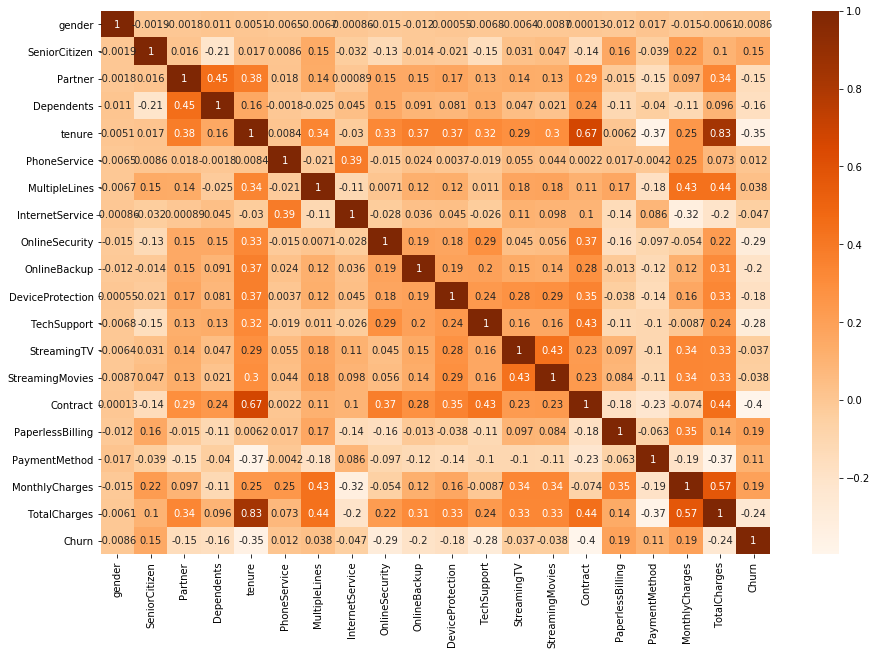

In [41]:
#get correlation of each feature in the dataset
# visualize correlation matrix using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data,cmap='Oranges',annot=True) 


In [42]:
#Now seperate the dataset into x and y
x = churn.drop('Churn',axis=1)
y = churn['Churn']

In [43]:
#let's check shape x and y
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [44]:
#Applying Standard scaling to get optimized result

#Lets bring features to common scale

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [45]:
# Train and Test splitting of data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [46]:
print(x_train.shape)
print(y_train.shape)

(5493, 19)
(5493,)


In [47]:
print(x_test.shape)
print(y_test.shape)

(1550, 19)
(1550,)


# Our training and testing data is ready now to perform machine learning algorithm¶

## Telecom Customer Churn prediction is a classification problem , so we can use Multiple classification algorithm with hyperparameter tune.

- first we use Logistic regression model because the target variable hold binary classification (0 and 1) to check  accuracy      score level.
- we also used different classification model to check and compare whether we get high accuracy score or not, this exercise       help us to select best model.

##  We will use the following algorithms

- Logistic Regression
- knn
- DecisionTrees
- Random Forests
- SVM
- naviebyes


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def max_accuracyscore(mod,x,y):
    max_accuracy_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = r_state)  
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        a_score=accuracy_score(y_test,y_pred)
        if a_score>max_accuracy_score:
            max_accuracy_score=a_score
            final_r_state=r_state
    print("max Accuracy_Score corresponding to ",final_r_state," is ",max_accuracy_score)
    return final_r_state

In [49]:
#Lets use logistic regression and check

lg =LogisticRegression()
max_accuracyscore(lg ,x,y)

max Accuracy_Score corresponding to  56  is  0.8180645161290323


56

In [50]:
# Lets use cross validation metod to get cross val score because target varible is imbalanced

from sklearn.model_selection import cross_val_score

print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="roc_auc").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,x,y,cv=5,scoring="roc_auc"))

Mean accuracy score for Logistic Regression:  0.8493640967948879
standard deviation in accuracy score for Logistic Regression:  0.010698232017896825


cross val accuracy score: [0.86337544 0.85988271 0.83469348 0.84357669 0.84529215]


In [51]:
from sklearn.model_selection import GridSearchCV

kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
Gvs = GridSearchCV(kc, neighbors, cv=5,scoring="accuracy")
Gvs.fit(x,y)
Gvs.best_params_

{'n_neighbors': 26}

In [52]:
kc=KNeighborsClassifier(n_neighbors=26)
max_accuracyscore(lg ,x,y)

max Accuracy_Score corresponding to  56  is  0.8180645161290323


56

In [53]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for KNeighbors: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in accuracy score for Kneighbors: ",cross_val_score(kc,x,y,cv=5,scoring="roc_auc").std())
print('\n')
print('cross val accuracy score:',cross_val_score(kc,x,y,cv=5,scoring="roc_auc"))

Mean accuracy score for KNeighbors:  0.8211829653770625
standard deviation in accuracy score for Kneighbors:  0.01421726662005327


cross val accuracy score: [0.84275233 0.83344054 0.80692991 0.81187007 0.81092197]


In [54]:
# let's use Bernoulli Naive Bayes model

from sklearn.naive_bayes import GaussianNB

Gan = GaussianNB()
max_accuracyscore(Gan,x,y)

max Accuracy_Score corresponding to  71  is  0.7729032258064517


71

In [55]:
print("Mean accuracy score for GaussianNB: ",cross_val_score(Gan,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in accuracy score for GaussianNB: ",cross_val_score(Gan,x,y,cv=5,scoring="roc_auc").std())
print('\n')
print('cross val accuracy score:',cross_val_score(Gan,x,y,cv=5,scoring="roc_auc"))


Mean accuracy score for GaussianNB:  0.8293296382083426
standard deviation in accuracy score for GaussianNB:  0.007586495876541861


cross val accuracy score: [0.84025937 0.83635589 0.82160609 0.8260766  0.82235025]


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
gb=GradientBoostingClassifier()
gv = GridSearchCV(gb, parameters, cv=5,scoring="accuracy")
gv.fit(x,y)
gv.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [57]:
gb =GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
max_accuracyscore(gb,x,y)

max Accuracy_Score corresponding to  56  is  0.8212903225806452


56

In [58]:
#lets check cross_val_score for gradient boosting
print("Mean accuracy for gradient boosting classifier: ",cross_val_score(gb,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation accuracy for gradient boosting classifier: ",cross_val_score(gb,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(gb,x,y,cv=5,scoring="roc_auc"))

Mean accuracy for gradient boosting classifier:  0.846866514528403
standard deviation accuracy for gradient boosting classifier:  0.010720259300714562
[0.85982976 0.85815314 0.83163864 0.84076621 0.84385699]


In [59]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
gv.fit(x,y)
gv.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [60]:
svc=SVC(kernel="linear",C=0.01,probability=True)
max_accuracyscore(svc,x,y)

max Accuracy_Score corresponding to  56  is  0.8174193548387096


56

In [61]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in accuracy score for SVC: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())
print('\n')
print('cross val accuracy score:',cross_val_score(svc,x,y,cv=5,scoring="roc_auc"))

# logistic regression and svc model gived same cross val score

Mean accuracy score for SVC:  0.8445522051556189
standard deviation in accuracy score for SVC:  0.009124181839769856


cross val accuracy score: [0.85630732 0.85381953 0.83329587 0.84265195 0.83668635]


In [62]:
#lets use random 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf=RandomForestClassifier()
Gcv = GridSearchCV(rf, parameters, cv=5,scoring="accuracy")
Gcv.fit(x,y)
Gcv.best_params_

{'n_estimators': 500}

In [63]:
rfc =RandomForestClassifier(n_estimators=500)
max_accuracyscore(rfc,x,y)

max Accuracy_Score corresponding to  98  is  0.8064516129032258


98

In [66]:
# lets check cross val score and mean accuracy of cross val score
print("Mean accuracy score for RandomForest: ",cross_val_score(rf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in accuracy score for RandomForest: ",cross_val_score(rf,x,y,cv=5,scoring="roc_auc").std())
print('\n')
print('cross val RandomForest:',cross_val_score(rf,x,y,cv=5,scoring="roc_auc"))


Mean accuracy score for RandomForest:  0.822852100087155
standard deviation in accuracy score for RandomForest:  0.012816757699336833


cross val RandomForest: [0.83583404 0.83875843 0.80946421 0.81009442 0.82410218]


# I used multiple algorithms to  get highest accuracy score corresponding to random state

- we seen till now Logistic regression is best model as comparision to other model which are apply in this  because we got max accuracy score is 85% at random state 56

- So we save model Logistic Regression for production.


In [76]:
# let's create final model logistic regression

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =56,test_size=0.22)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
a_score=accuracy_score(y_test,y_pred)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("Mean accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in accuracy score for Logistic Regression: ",cross_val_score(lg,x,y,cv=5,scoring="roc_auc").std())
print('\n')
print('cross val accuracy score:',cross_val_score(lg,x,y,cv=5,scoring="roc_auc"))

Confusion matrix 
 [[1052   89]
 [ 193  216]]
classification report 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1141
           1       0.71      0.53      0.61       409

    accuracy                           0.82      1550
   macro avg       0.78      0.73      0.74      1550
weighted avg       0.81      0.82      0.81      1550

Mean accuracy score for Logistic Regression:  0.8493640967948879
standard deviation in accuracy score for Logistic Regression:  0.010698232017896825


cross val accuracy score: [0.86337544 0.85988271 0.83469348 0.84357669 0.84529215]


In [67]:
# let's draw roc_auc_curve for Logistic regression model because it is our final model 

from sklearn.metrics import roc_curve,roc_auc_score

y_pred_prob=svc.predict_proba(x_test)[:,1]

#predict_proba function will take test data and try to predict internaly the higher level of queue of given test data

In [68]:
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob) # text actual with predicted probality y

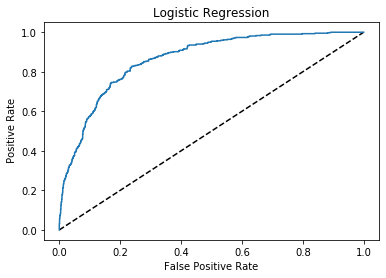

In [69]:
y_pred_prob=svc.predict_proba(x_test)[:,1]
fpr,tpr,treshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel(' Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [71]:
# let's check roc_auc _score 

auc_score= roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.7373941976163112

In [77]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(lg,'Telecom_Customer_Churn.pkl')

['Telecom_Customer_Churn.pkl']